In [1]:
from sqlalchemy import create_engine
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from gp_keys import gp_key

/Users/user/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Connecting to the Sql-Challenge database
conn2 = ps.connect(dbname = 'SQL_Challenge',
                   user = 'postgres',
                   password = gp_key,
                   host = 'localhost',
                   port = '5432')

In [4]:
#Selecting all columns from the salaries table
sql ="""select * from salaries"""

In [5]:
#converting the the salaries table to a dataframe
df_salaries = sqlio.read_sql_query(sql, conn2)

In [6]:
df_salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [7]:
#checking for duplicates
df_salaries.emp_no.duplicated().sum()

0

In [8]:
df_salaries.shape

(300024, 2)

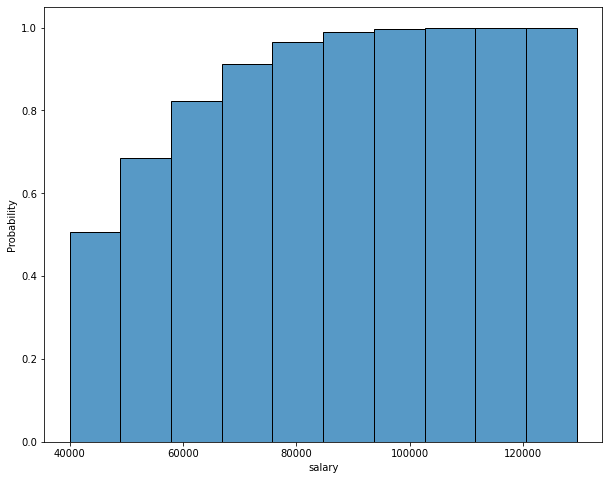

In [15]:
#Plot a histogram of salary
plt.figure(figsize=(10,8))
sns.histplot(df_salaries.salary,
             kde = False, 
             bins = 10,
             stat = 'probability', 
             element = 'bars', 
             cumulative = 'true');

plt.show()

In [12]:
df_salaries.shape

(300024, 2)

In [13]:
#selecting all columns from depart_employee_names table
depart_employee_names = """select * from depart_employee_names"""

In [14]:
df_employee_and_departments = sqlio.read_sql_query(depart_employee_names, conn2)

In [15]:
df_employee_and_departments.head()

,emp_no,last_name,first_name,dept_name
0,10005,Maliniak,Kyoichi,Marketing
1,10010,Piveteau,Duangkaew,Marketing
2,10010,Piveteau,Duangkaew,Marketing
3,10011,Sluis,Mary,Marketing
4,10013,Terkki,Eberhardt,Marketing


In [16]:
#showing the number of columns including duplicates in the data
df_employee_and_departments.shape

(2984427, 4)

In [17]:
df_employee_and_departments.dept_name.unique()

array(['Marketing', 'Finance', 'Human Resources', 'Production',
       'Development', 'Quality Management', 'Sales', 'Research',
       'Customer Service'], dtype=object)

In [18]:
#showing the total number employees (emp_no) without any duplicates. 
df_employee_and_departments.emp_no.duplicated().sum()

2684403

In [19]:
#The total number of employees in the salaries table is 300024 and there are no duplicates

In [20]:
#We can see that there that have duplicates in df_salaries_and_departments detaframe.  

In [21]:
#dropping duplicates that have the same emp_no and dept_name.

df_employee_and_departments.drop_duplicates(subset=['emp_no', 'dept_name'], keep='last', inplace = True)

In [22]:
df_employee_and_departments.head()

,emp_no,last_name,first_name,dept_name
0,10005,Maliniak,Kyoichi,Marketing
2,10010,Piveteau,Duangkaew,Marketing
3,10011,Sluis,Mary,Marketing
4,10013,Terkki,Eberhardt,Marketing
5,10017,Bouloucos,Cristinel,Marketing


In [23]:
# If duplicates are removed from the employee_and_department_df, 
#the number of employees in the departments  is 27000216 and 
#is not the same as number of employees on the salary table. infact the salary table has 300024. 
#This appears to suggests that there are employees on the payroll without a department or are ghost workers

df_employee_and_departments.shape

(2700216, 4)

In [24]:
df_salaries_and_departments = pd.merge(
                                df_employee_and_departments, df_salaries, 
                                on = 'emp_no', how = 'left' 
)

In [25]:
df_salaries_and_departments.head()

,emp_no,last_name,first_name,dept_name,salary
0,10005,Maliniak,Kyoichi,Marketing,78228
1,10010,Piveteau,Duangkaew,Marketing,72488
2,10011,Sluis,Mary,Marketing,42365
3,10013,Terkki,Eberhardt,Marketing,40000
4,10017,Bouloucos,Cristinel,Marketing,71380


In [26]:
df_salaries_and_departments.shape

(2700216, 5)

In [27]:
employee_title_id = """select*from employees_and_title_id"""

In [28]:
df_employee_title_id = sqlio.read_sql_query(employee_title_id, conn2)

In [29]:
df_employee_title_id.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,e0002,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,e0002,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,e0003,Senior Engineer


In [30]:
#To plot a barplot of salary against title. 
#Dataframes of df_salaries and df_salary_and_title_id need to be merged

df_salary_and_title_id = pd.merge(
                                df_employee_title_id, df_salaries, 
                                on = 'emp_no', how = 'left' 
)

In [31]:
df_salary_and_title_id.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,e0002,Engineer,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,e0002,Engineer,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,e0003,Senior Engineer,40000


In [32]:
df_salary_and_title_id.shape

(300024, 10)

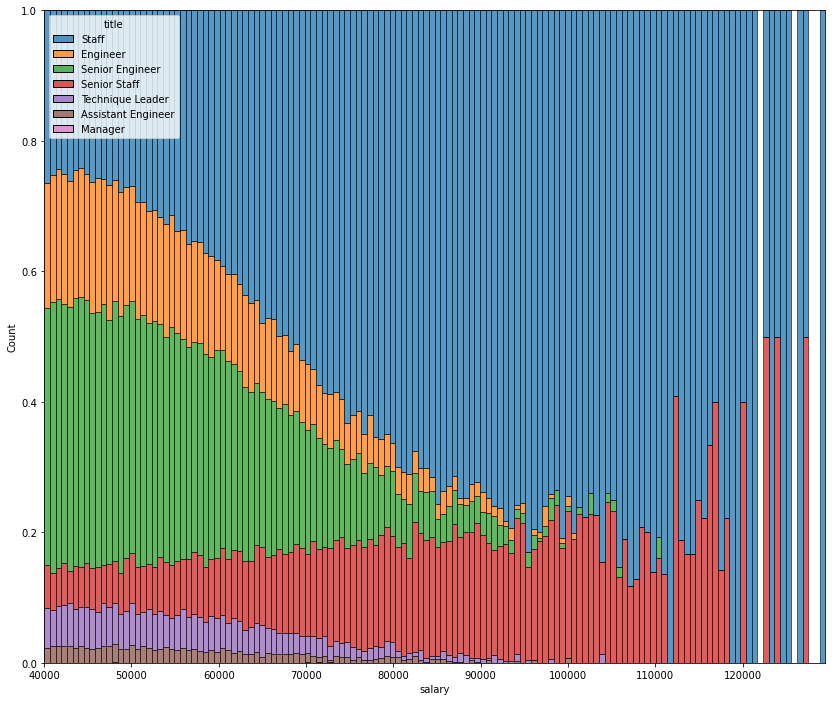

In [146]:
#a barplot of salary against title
plt.figure(figsize=(14,12))
sns.histplot(x = 'salary', data = df_salary_and_title_id,
             hue = 'title', multiple = 'fill', kde = False);

staff employees are more most likely to earn a higher salary than those with any other title, followed by senior staff

## Barplot

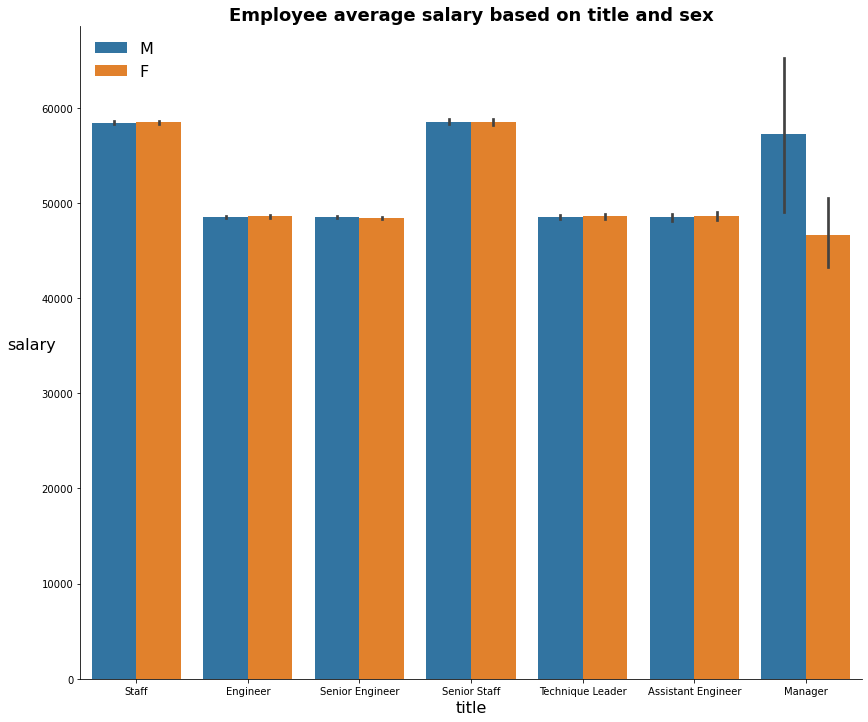

In [133]:

plt.figure(figsize=(14,12))
sns.barplot(x = 'title', 
            y = 'salary', 
            hue = "sex",
            data = df_salary_and_title_id, 
            ci = 95 ),

sns.despine();
plt.xticks(rotation=0),
plt.xlabel('title', fontsize = 16,),
plt.ylabel('salary', rotation = 0,  position =( -.9,0), fontsize = 16,  labelpad = 10,)
plt.title('Employee average salary based on title and sex', fontsize = 18, loc = None, fontweight = 'bold')
plt.legend(fontsize = 16, frameon = False)
plt.show()




## Conclusions

The title does not appear to have a significant influence  on the salary that the employee earns.i.e an employee with the senior staff earns the same amount as an employee with a staff title. 

In the main this company is fair on its employees irrespective of their sex

On average M and F employees with the same title earn the same amount. #Apart from those with the title manager where f employees are disadvantaged.

The number of employees in the departments  is 27000216 and is not the same as number of employees on the salary table. infact the salary table has 300024. 

This appears to suggests that there are employees on the payroll without a department or are ghost workers
